In this note book i apply cnn for the chest cancer. it will predict what types of cancer

import necessary library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import Dense,Conv2D,Input,MaxPool2D,BatchNormalization,Dropout,Flatten
from keras.models import Sequential
from keras.preprocessing import image_dataset_from_directory
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
import cv2
from keras.regularizers import l2

In [3]:
train_dir="Data/train"
test_dir="Data/test"

Loading the data from the image directory training, testing, validataion

In [4]:
training_data=image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    shuffle=True,
    batch_size=32,
    color_mode="grayscale",
    image_size=(100,100)
)

Found 613 files belonging to 4 classes.


In [5]:
test_data=image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    shuffle=True,
    batch_size=32,
    color_mode="grayscale",
    image_size=(100,100)
)

Found 315 files belonging to 4 classes.


In [6]:
valid_data=image_dataset_from_directory(
    "Data/valid",
    label_mode="categorical",
    shuffle=True,
    batch_size=32,
    color_mode="grayscale",
    image_size=(100,100)
)

Found 72 files belonging to 4 classes.


In [7]:
classess=training_data.class_names

Creating our cnn model 

In [8]:
model=Sequential([
    Input((100,100,1)),
    Conv2D(filters=32,kernel_size=(3,3),activation="relu",kernel_regularizer=l2(0.001)),
    Conv2D(filters=64,kernel_size=(3,3),activation="relu",kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.5),
    Conv2D(filters=128,kernel_size=(3,3),activation="relu",kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.5),
    Flatten(),
    Dense(1500,activation="relu",kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(len(classess),activation="softmax")
])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 96, 96, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 96, 96, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 46, 46, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │   101,569,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         6,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,668,944 (387.84 MB)

 Trainable params: 101,668,560 (387.83 MB)

 Non-trainable params: 384 (1.50 KB)

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(0.0001),metrics=["accuracy"])

In [11]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Training our model

In [12]:
history=model.fit(training_data,epochs=10,validation_data=valid_data,callbacks=[lr_scheduler, early_stopping],verbose=1)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 897ms/step - accuracy: 0.4126 - loss: 12.0708 - val_accuracy: 0.2083 - val_loss: 24.0064 - learning_rate: 1.0000e-04
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 924ms/step - accuracy: 0.7125 - loss: 5.1421 - val_accuracy: 0.5000 - val_loss: 10.2779 - learning_rate: 1.0000e-04
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 807ms/step - accuracy: 0.8206 - loss: 4.1203 - val_accuracy: 0.5417 - val_loss: 6.3856 - learning_rate: 1.0000e-04
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 763ms/step - accuracy: 0.8564 - loss: 3.7473 - val_accuracy: 0.5556 - val_loss: 5.6020 - learning_rate: 1.0000e-04
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 760ms/step - accuracy: 0.8662 - loss: 3.5880 - val_accuracy: 0.6111 - val_loss: 4.8015 - learning_rate: 1.0000e-04
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 751ms/step - accuracy: 0.9419 - loss: 3.2333 - val_accuracy: 0.6250 - val_loss: 5.0523 - learning_rate: 1.0000e-04
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 757ms/step - 

In [13]:
model.evaluate(test_data)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.3896 - loss: 6.5143


[6.269556999206543, 0.4095238149166107]

In [14]:
model.predict(test_data)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step


array([[1.5640411e-01, 8.0188966e-01, 1.0580064e-03, 4.0648215e-02],
       [9.3038297e-09, 1.4650565e-14, 1.0000000e+00, 4.7997194e-08],
       [6.9213140e-01, 2.7943695e-01, 9.0322737e-03, 1.9399399e-02],
       ...,
       [7.7884328e-03, 9.9201387e-01, 1.9416962e-04, 3.5138023e-06],
       [1.1899303e-19, 1.3324905e-20, 1.0000000e+00, 4.7562640e-17],
       [4.2863371e-07, 7.4666557e-09, 9.9999940e-01, 1.0762535e-07]],
      dtype=float32)

ploting our model with the prediction with the answer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


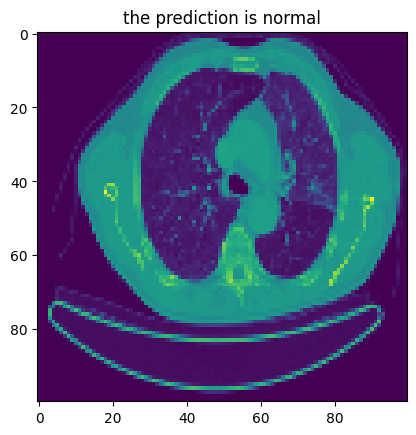

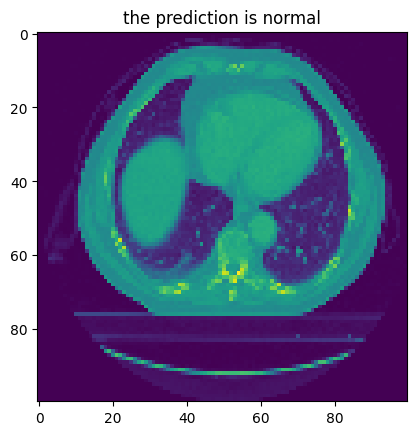

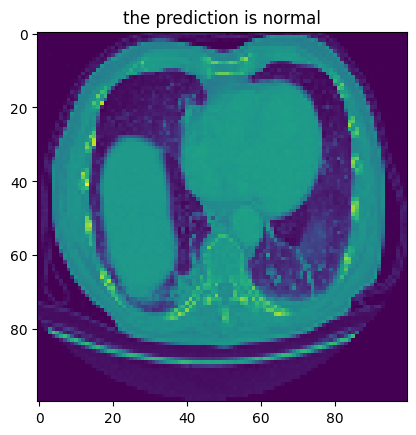

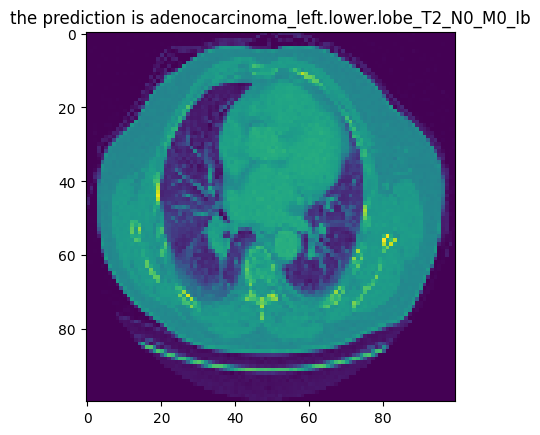

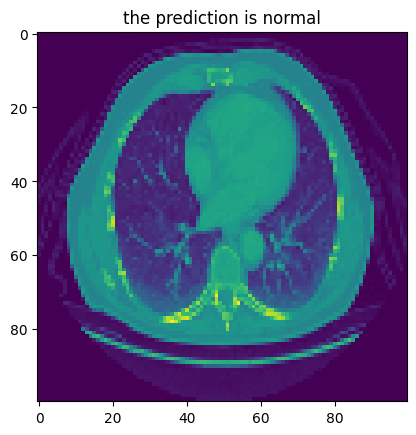

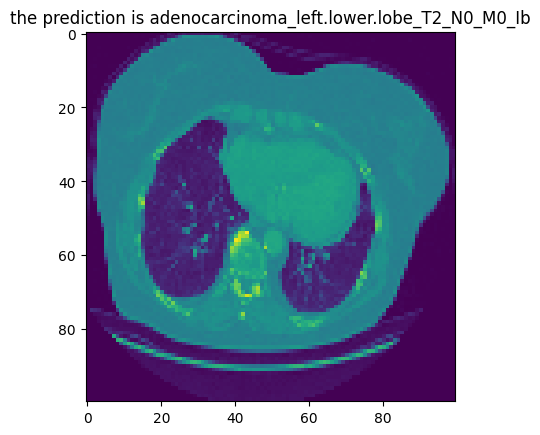

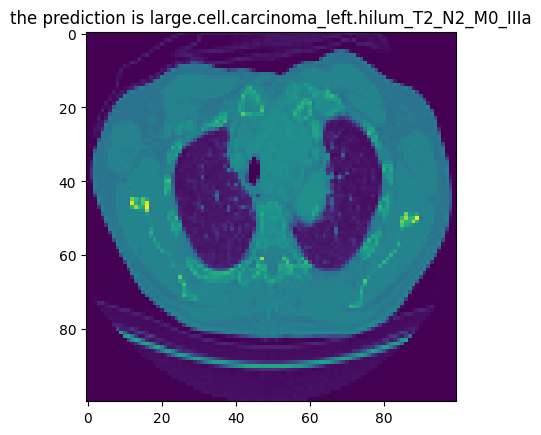

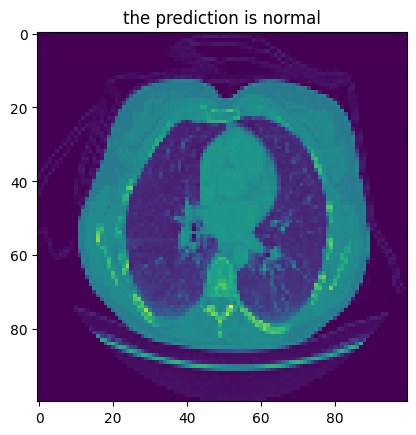

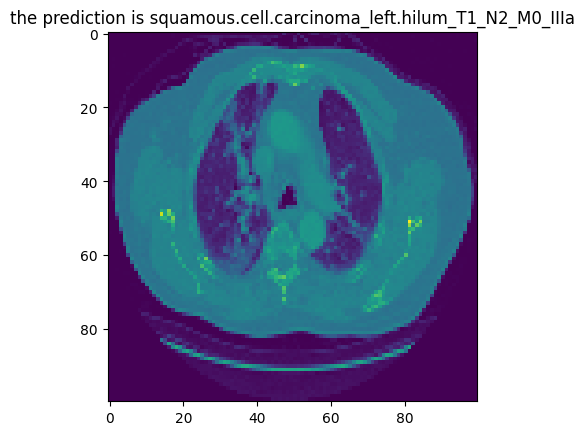

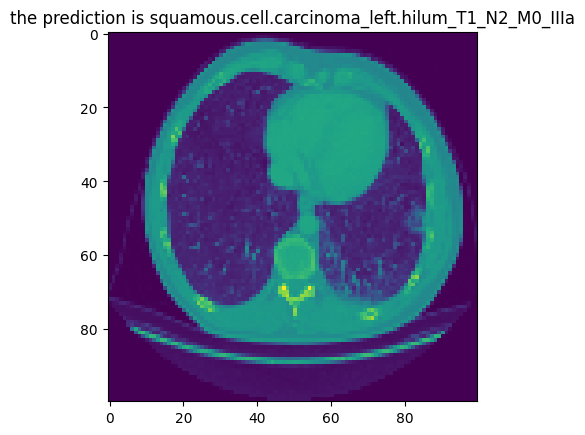

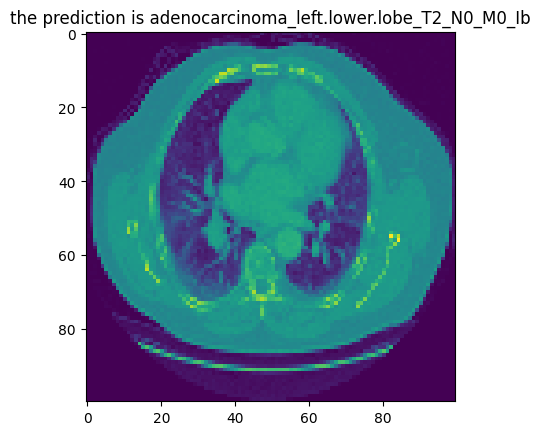

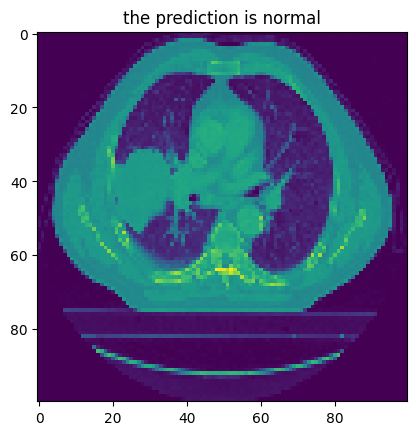

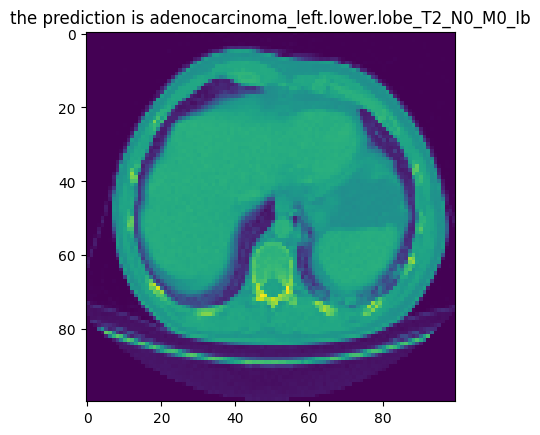

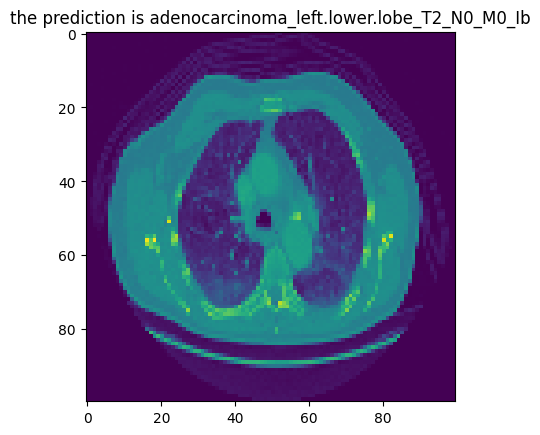

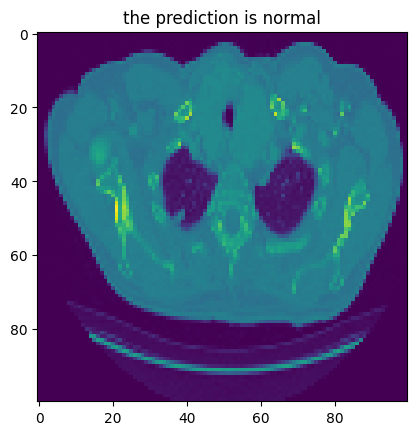

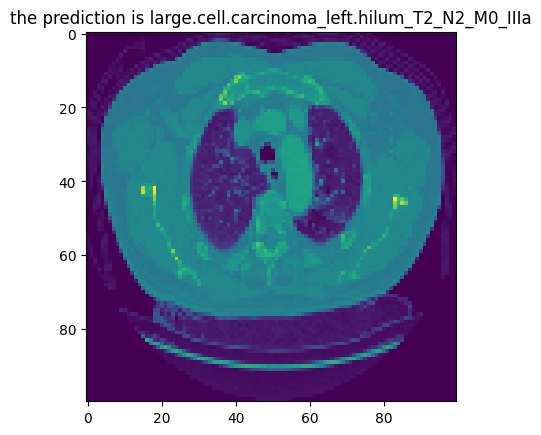

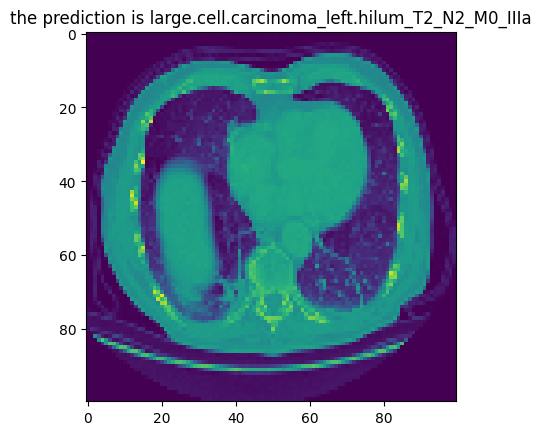

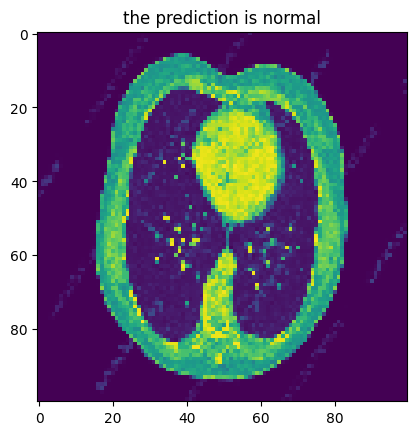

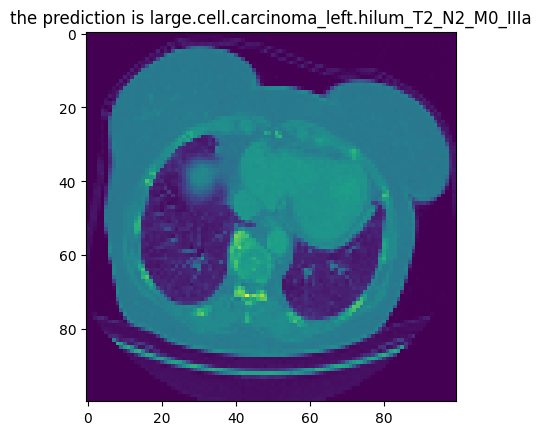

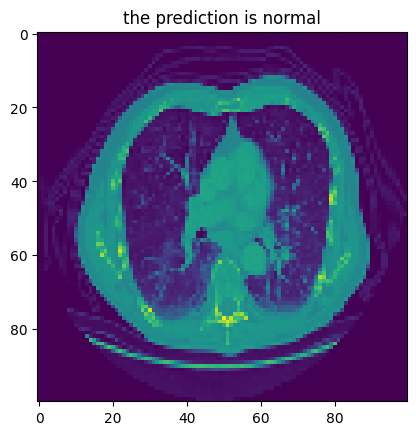

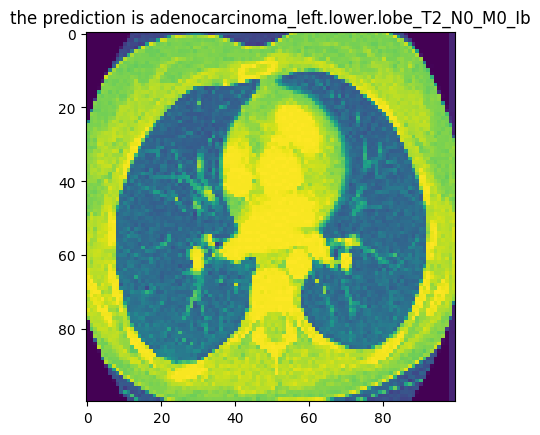

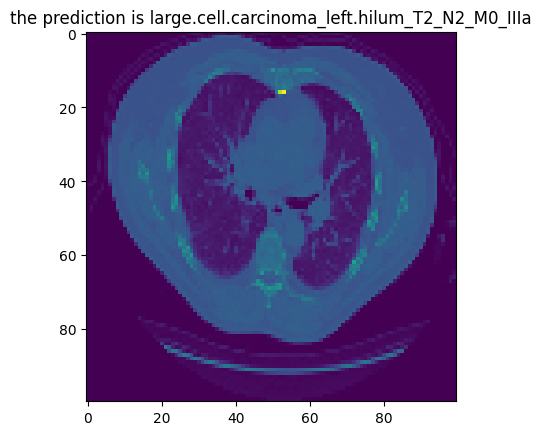

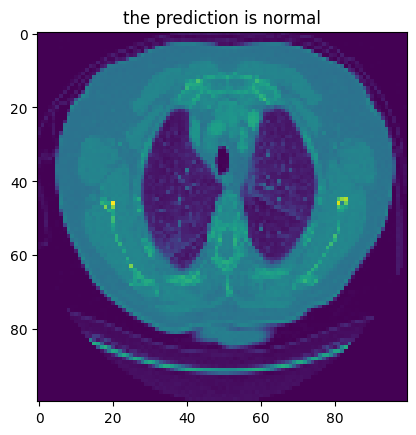

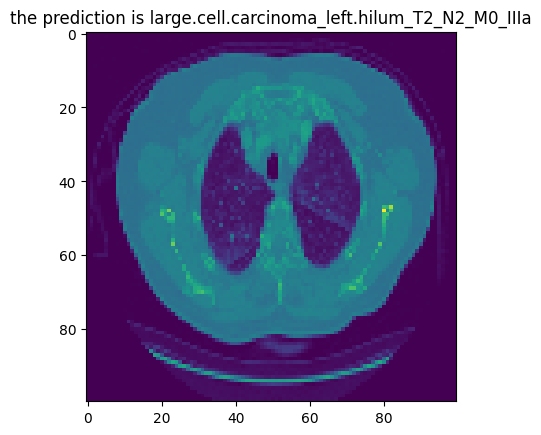

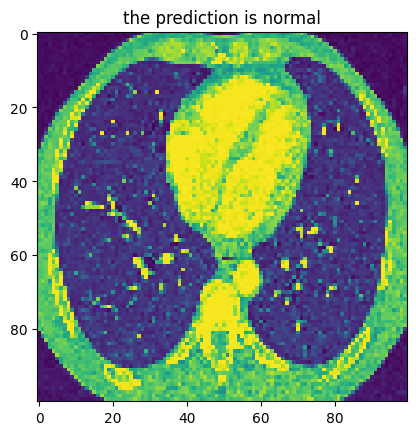

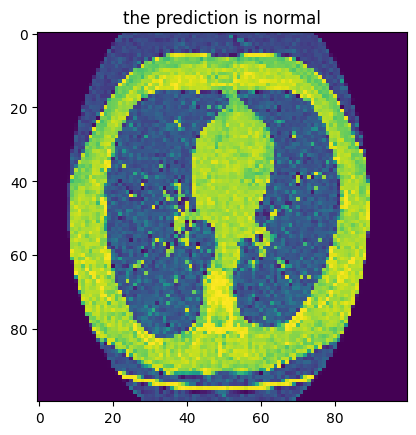

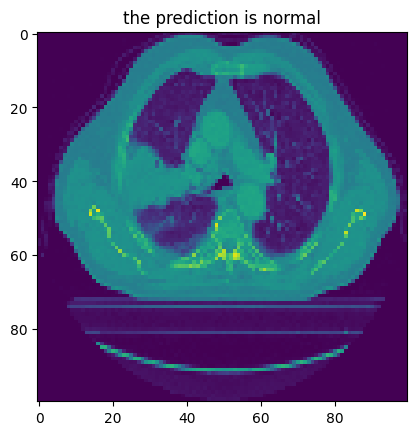

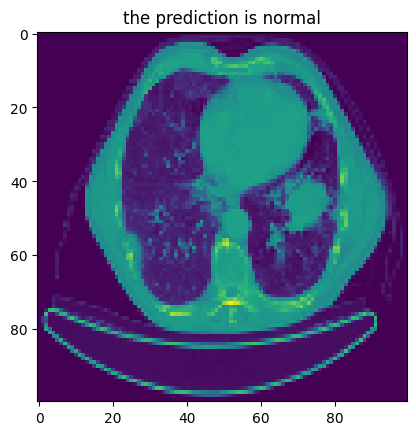

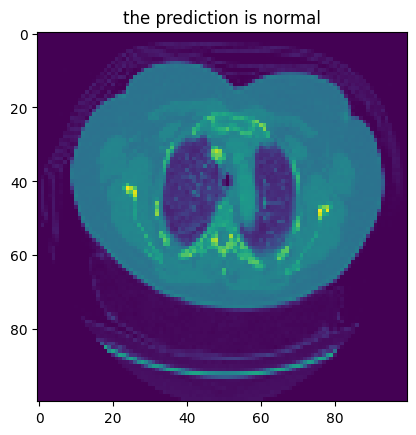

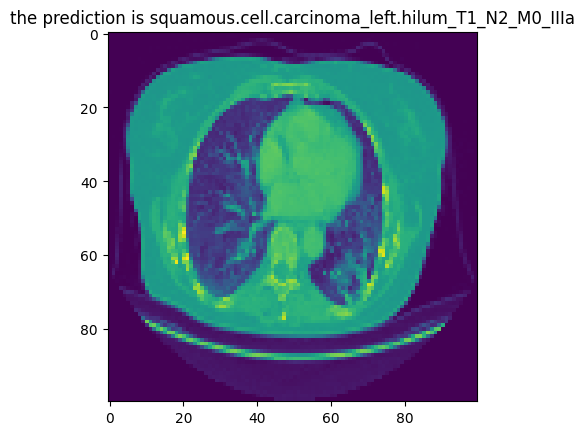

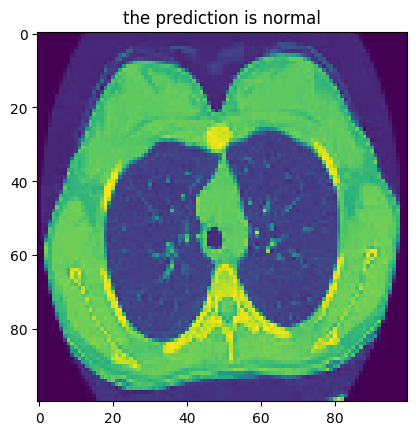

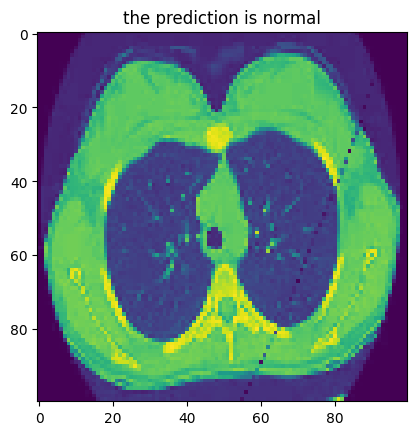

In [15]:
for img,lab in test_data.take(1):
    pred=model.predict(img)
    for i in range(len(img)):
        plt.title(f"the prediction is {classess[np.argmax(pred[i])]}")
        plt.imshow(img[i].numpy())
        plt.show()

In [19]:
import seaborn as sns

<Axes: >

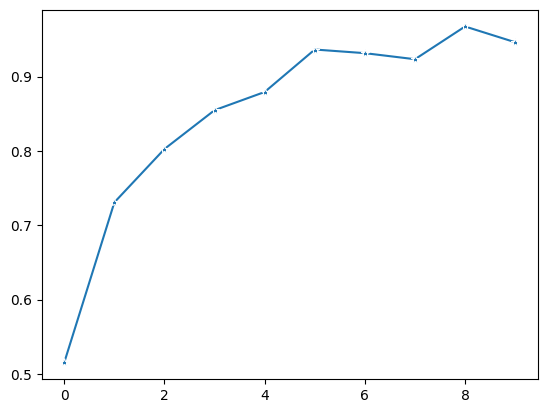

In [37]:
sns.lineplot(history.history['accuracy'],marker="*")


<Axes: >

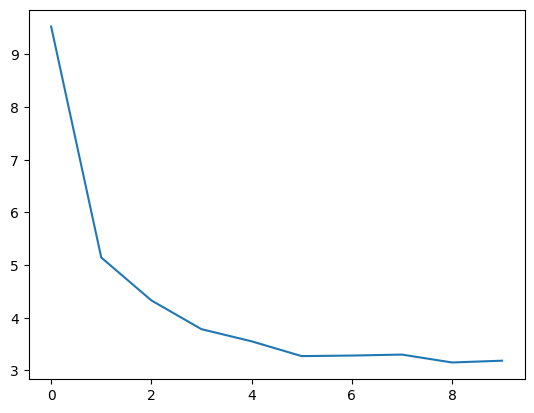

In [25]:
sns.lineplot(history.history['loss'])

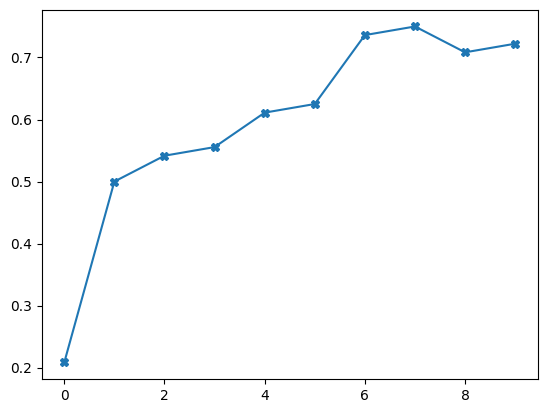

In [33]:
plt.plot(history.history["val_accuracy"],label="accuracy",marker="X")
plt.show()

<Axes: >

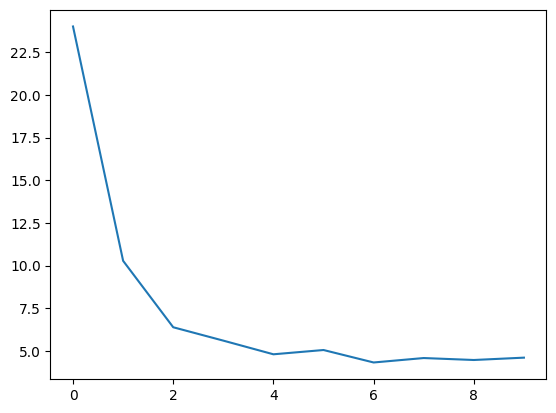

In [29]:
sns.lineplot(history.history["val_loss"])